<a href="https://colab.research.google.com/github/JuanGarcia88/Maquinas_II/blob/main/Taller_1_MAQUINAS_ASINCRONASJD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

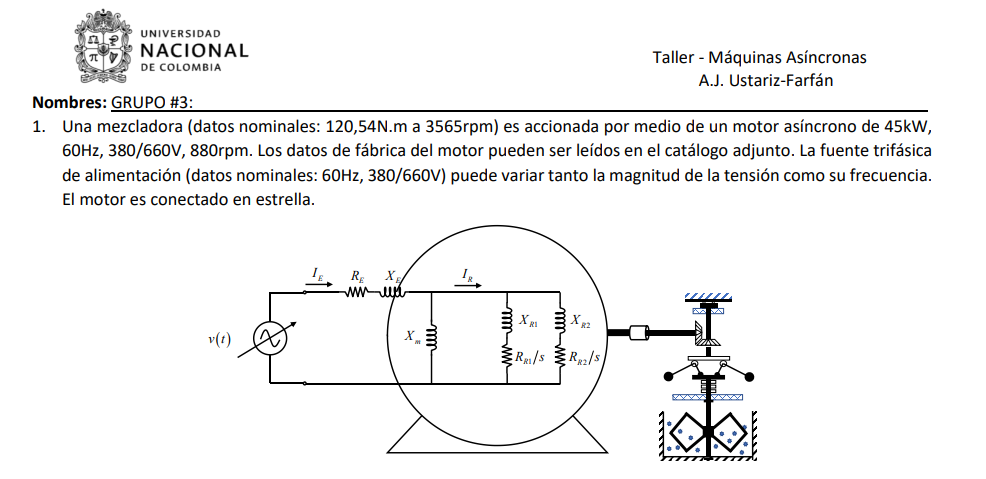

# **<font color="black"><center>Motor seleccionado**

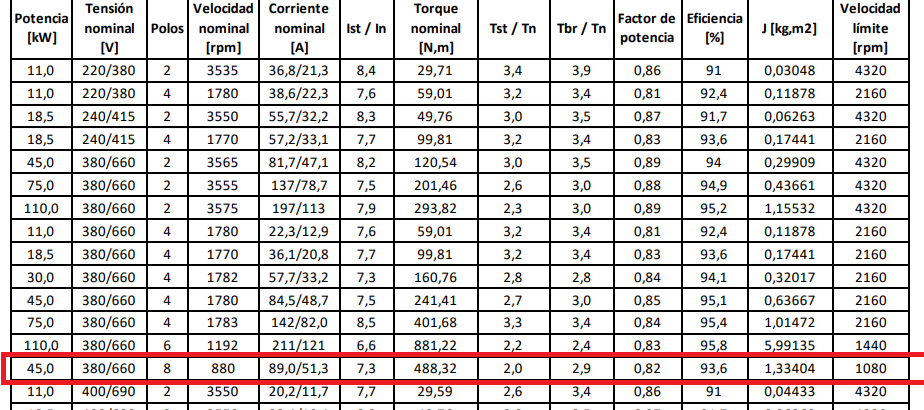

In [179]:
## CALCULOS INICIALES

Vn_linea = 660
Ve = 380
f = 60
Pn_w = 45000
Polos = 8
Tn = 488.32
In = 51.3
Il_In = 7.3
Tl = 2.0
Tb = 2.9
Nn = 880
Ns = 900
fp = 82
J = 1.33404

# **<font color="red"><center>Utilizando el estimador proporcionado**

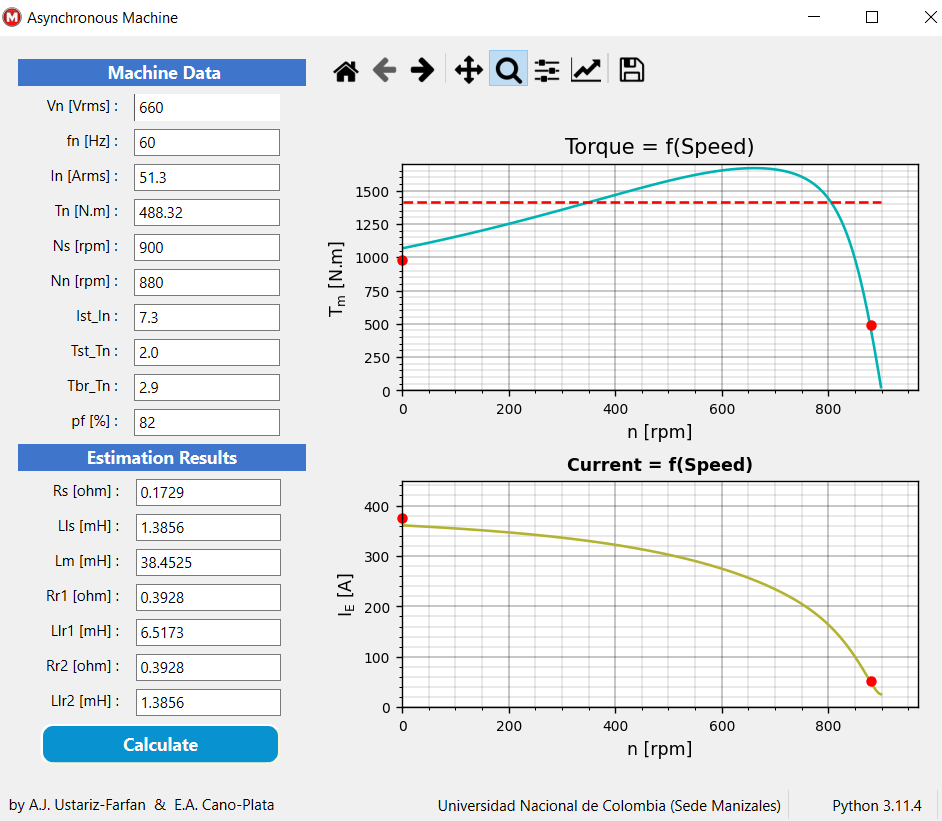

In [180]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import cmath

In [181]:
Rs = 0.1729
Xs = (2*np.pi*f)*(1.3856*(10**-3))
Xm = (2*np.pi*f)*(38.4525*(10**-3))
R1 = 0.3928
X1 = (2*np.pi*f)*(6.5173*(10**-3))
R2 = 0.3928
X2 = (2*np.pi*f)*((1.3856*10**-3))

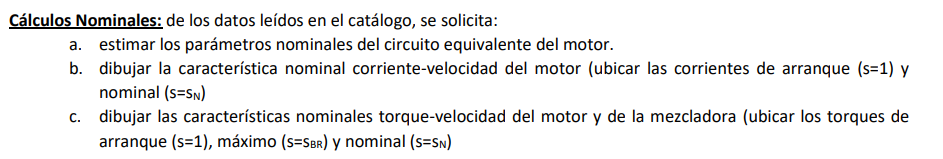

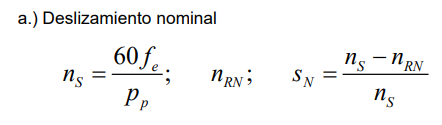

In [182]:
Sn = (Ns - Nn ) / Ns
print(Sn)

0.022222222222222223


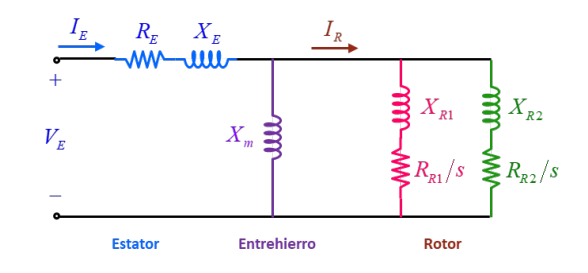

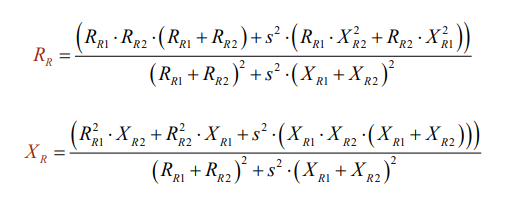

In [192]:
Rr_N = (R1*R2*(R1+R2)+Sn**2*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+Sn**2*(X1+X2)**2)
Rr_St =(R1*R2*(R1+R2)+1**2*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+1**2*(X1+X2)**2)
Rr_V = (R1 * R2 * (R1 + R2) + 0.0000001**2 * (R1 * X2**2 + R2 * X1**2)) / ((R1 + R2)**2 + 0.0000001**2 * (X1 + X2)**2)
print(Rr_N)
print(Rr_St)
print(Rr_V)

0.19698401582741787
0.2738280550782114
0.1964000000000119


In [193]:
Xr_N = (R1**2 * X2 + R2**2 * X1 + Sn**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + Sn**2 * (X1 + X2)**2)
Xr_St = (R1**2 * X2 + R2**2 * X1 + 1**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + 1**2 * (X1 + X2)**2)
Xr_V = (R1**2 * X2 + R2**2 * X1 + 0.0000001**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + 0.0000001**2 * (X1 + X2)**2)
print(Xr_N)
print(Xr_St)
print(Xr_V)

0.7426159456755661
0.45119127409480436
0.7448307774615981


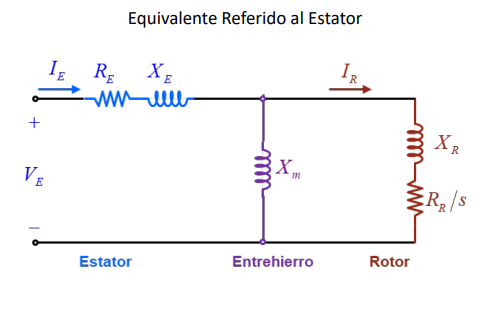

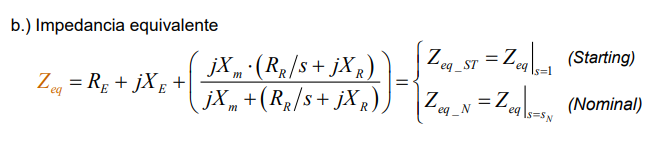

In [215]:
Zeq_ST = complex(Rs, Xs)+(((complex(0, Xm)*((Rr_N)+complex(0, Xr_N)))/(complex(0, Xm)+((Rr_N)+complex(0, Xr_N)))))
r, theta = abs(Zeq_ST), cmath.phase(Zeq_ST)
print(Zeq_ST)
print(f"Forma polar: {r}∠{theta} ")

(0.3511232962345153+1.231089688683608j)
Forma polar: 1.2801833426278026∠1.2929597967146633 


In [217]:
Zeq_N = complex(Rs, Xs)+(((complex(0, Xm)*((Rr_N/Sn)+complex(0, Xr_N)))/(complex(0, Xm)+((Rr_N/Sn)+complex(0, Xr_N)))))
r1, theta1 = abs(Zeq_N), cmath.phase(Zeq_N)
print(Zeq_N)
print(f"Forma polar: {r1}∠{theta1} ")

(6.166336840091103+4.715101964325068j)
Forma polar: 7.762467169621192∠0.6528126472941296 


In [216]:
Zeq_V = complex(Rs, Xs)+(((complex(0, Xm)*((Rr_V/0.0000001)+complex(0, Xr_V))))/(complex(0, Xm)+((Rr_V/0.0000001)+complex(0, Xr_V))))
r2, theta2 = abs(Zeq_V), cmath.phase(Zeq_V)
print(Zeq_V)
print(f"Forma polar: {r2}∠{theta2} ")

(0.17300699658477842+15.018609874326746j)
Forma polar: 15.019606319011565∠1.5592773282977357 


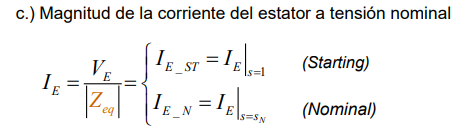

In [218]:
Ie_star = Ve/r
print(Ie_star)

296.83248277546153


In [201]:
Ie_nominal = Ve/r1
print(Ie_nominal)

48.95350816904569


In [203]:
Ie_vacio = Ve/r2
print(Ie_vacio)

25.3002636639685


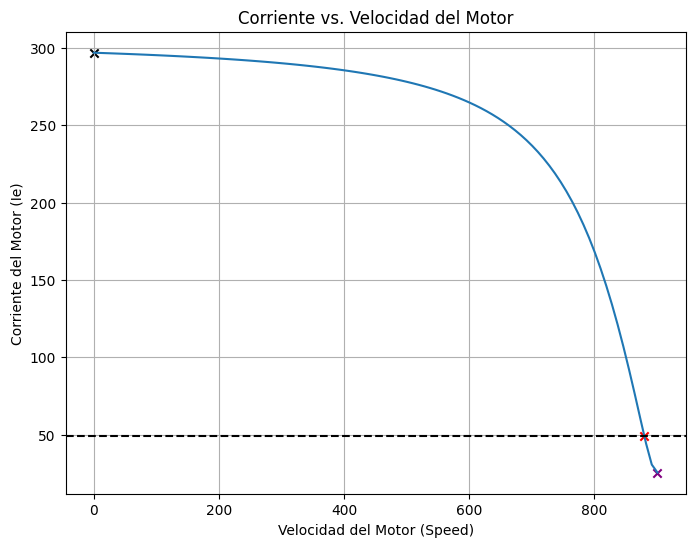

In [219]:
Speed = np.linspace(0, 901, 100)
Sn_plot=(Ns-Speed)/Ns
Zeq_plot = complex(Rs, Xs)+(((complex(0, Xm)*(((Rr_N/Sn_plot)+complex(0, Xr_N))))/(complex(0, Xm)+(((Rr_N/Sn_plot)+complex(0, Xr_N))))))
r_plot = abs(Zeq_plot)
Ie = Ve/r_plot

y2=Ie_nominal
plt.figure(figsize=(8, 6))
plt.plot(Speed, Ie)
plt.xlabel('Velocidad del Motor (Speed)')
plt.ylabel('Corriente del Motor (Ie)')
plt.axhline(y=y2, linestyle='--', color='black')
plt.title('Corriente vs. Velocidad del Motor')
plt.scatter(0, Ie_star , marker= 'x', color='black', label='Ie_Star')
plt.scatter(880, Ie_nominal , marker= 'x', color='red', label='Ie_Star')
plt.scatter(900, Ie_vacio , marker= 'x', color='purple', label='Ie_Star')
plt.grid(True)
plt.show()
